# Monet's Paintings Through the Decades

The purpose of this notebook is to explore different features of Monet's work through his lifetime. Through creating maps using thumbnails of his paintings, we would like to see if the hardships he lived through his life had an impact on the type of work he created. 


In the 1910's, Monet faced many tragedies that affected his mental state. In 1911, his second wife died from leukemia. After this, Monet wrote "I am annihalated" to a friend, and a year in 1912 later he wrote to his daughter saying ""The painter is dead and what remains is an inconsolable husband." To another daughter Monet wrote that he felt his artwork was a "horrible joke", and did not have any more will to keep painting. To add to this year of misery, in 1912 Monet also began losing his eyesight. Monet was always heavily praised by critics on his extraordinary eyesight, so this was a huge tragedy as well. Lastly, around two years later in 1914 Monet also lost a son. 

After facing so many devastating setbacks, it would be hard for anyone to be the same person. Through learning about all these misfortunes, we wanted to look to see if there was a qualitative change in Monet's work. Through making maps that graph the mean saturation, brightness and hue of his paintings through the decades, we want to see if there is a noticeable change after the 1910s. 

In [3]:
#import necessary packages
from PIL import Image
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os
import requests
import skimage
from skimage import data
from skimage.color import rgb2hsv
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Similar to excercise 1, we create a directory for thumbnails of Monet's work. We will use these thumbnails to make our plots later on. 

In [73]:
#create folder to store thumbnails if it doesn't exist
thumbnails = os.path.join('../data', 'thumbnails')
if not os.path.exists(thumbnails):
    os.makedirs(thumbnails)

In [2]:
#create function to make thumbnails
def make_thumbnail(file, imagepath, thumbnailpath):
    photo = Image.open(imagepath) #25x25
    size = 128, 128
    photo.thumbnail(size)
    photo.save(thumbnailpath + '/' + file)

In [76]:
directory = r'/Users/mollyrowland/Downloads/Github/dsc160-midterm-group12/data/images/'
for file in os.listdir(directory):
    if file.endswith('.jpg'):
        make_thumbnail(file, (directory + file), thumbnails)

#### Once the thumbnails are all saved, we are ready to start plotting Monet's work on figures

We then load in the dataframe created to make our model. Since we want to plot features against decades, we once again change the dates to be decades for easier comparison and plotting purposes

In [52]:
df = pd.read_csv('../data/data.csv')

In [62]:
#make dates into decades for easier comparison/plotting
df['date'] = df['date'].apply(lambda x: str(x)[:3]+'0')
df['date'].value_counts()

1880    461
1870    315
1890    184
1900    164
1860    103
1910     86
1920     50
1850      1
Name: date, dtype: int64

In order to plot decade on the x-axis we need the decade value to be able to work with the size of the bitmap. Since there are 8 decades, we create a corresponding proportion in order of the decades to be able to plot them along the x-axis of the graphs

In [6]:
#add a column to df with appropriate proportion for x-axis on graphs
df['axis_value'] = df['date']
start = 0
for i in range (1850, 1930, 10):
    start += 1
    df.loc[df['date'] == str(i), 'axis_value'] = str(start/8)

In [7]:
df.head()

,name,date,style,genre,height,width,mean_hue,mean_saturation,mean_value,mean_energy,edge_count,has_face,axis_value
0,lighthouse-at-the-hospice.jpg,1860,Impressionism,cityscape,848,1280,0.161592,0.369811,0.639680,1581.759686,848,0,0.25
1,view-at-rouelles-le-havre.jpg,1850,Realism,landscape,797,1280,0.418561,0.323907,0.559839,1304.028243,797,0,0.125
2,a-corner-of-the-studio(1).jpg,1860,Realism,self-portrait,1273,881,0.465204,0.360307,0.356693,9083.166369,1273,0,0.25
3,trophies-of-the-hunt.jpg,1860,Realism,still life,1200,850,0.300296,0.622229,0.386603,1323.287669,1200,0,0.25
4,a-farmyard-in-normandy(1).jpg,1860,Realism,landscape,974,1280,0.129511,0.490746,0.463133,1584.791794,974,0,0.25


#### We can now start creating the actual graphs! 

First, we will plot Mean Hue through the decades to see if the colors Monet chose to work with shifted as his life got increasingly more difficult.

In [98]:
# create background image
GLOBAL_WIDTH = 10000
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (12000, GLOBAL_WIDTH), bg_color)

In [99]:
coordinates = []
thumbs = []
for i in os.listdir(r'/Users/mollyrowland/Downloads/Github/dsc160-midterm-group12/data/thumbnails'):
    if df['name'].str.contains(str(i)).any():
        x = int(float(df.loc[df['name'] == str(i)]['axis_value'].values[0]) * GLOBAL_WIDTH)
        y = int(df.loc[df['name'] == str(i)]['mean_hue'].values[0]*GLOBAL_WIDTH)
        co = (x, y)
        coordinates.append(co)
        thumbs.append(i)

In [100]:
# iterate over images/coords and draw to image
for i in range(len(coordinates)):
    thumb_img = Image.open(r'/Users/mollyrowland/Downloads/Github/dsc160-midterm-group12/data/thumbnails/' + str(thumbs[i]))
    figure.paste(thumb_img, coordinates[i])

Text(0.5, 1.0, 'Mean Hue vs Year')

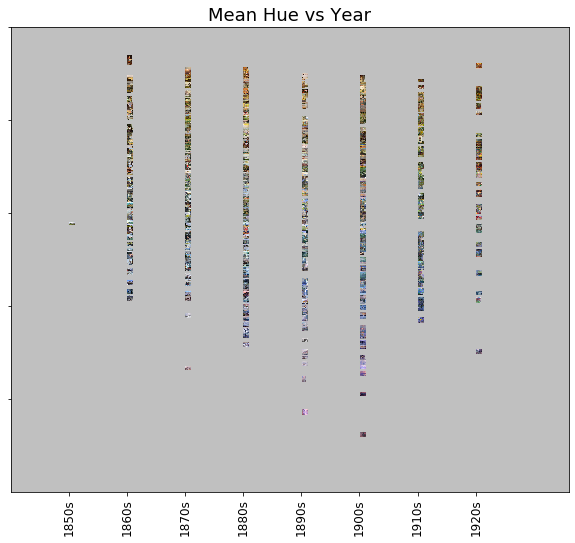

In [101]:
figure.save("meanhue.jpg")
image = plt.imread("meanhue.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)

ax.set_yticklabels([])

# Set number of ticks for x-axis
ax.set_xticks([1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000])
# Set ticks labels for x-axis
ax.set_xticklabels(['1850s','1860s', '1870s', '1880s', '1890s', '1900s', '1910s', '1920s'], rotation='vertical', fontsize=12)

ax.set_title("Mean Hue vs Year", fontsize = 18)

We now do the same for Mean Value(Brightness) through the years.

In [102]:
# create background image
GLOBAL_WIDTH = 10000
bg_color = (192, 192, 192) 
figure = Image.new('RGB', (12000, GLOBAL_WIDTH), bg_color)

In [103]:
coordinates = []
thumbs = []
for i in os.listdir(r'/Users/mollyrowland/Downloads/Github/dsc160-midterm-group12/data/thumbnails'):
    if df['name'].str.contains(str(i)).any():
        x = int(float(df.loc[df['name'] == str(i)]['axis_value'].values[0]) * GLOBAL_WIDTH)
        y = int(df.loc[df['name'] == str(i)]['mean_value'].values[0]*GLOBAL_WIDTH)
        co = (x, y)
        coordinates.append(co)
        thumbs.append(i)

In [104]:
# iterate over images/coords and draw to image
for i in range(len(coordinates)):
    thumb_img = Image.open(r'/Users/mollyrowland/Downloads/Github/dsc160-midterm-group12/data/thumbnails/' + str(thumbs[i]))
    figure.paste(thumb_img, coordinates[i])

Text(0.5, 1.0, 'Mean Value vs Year')

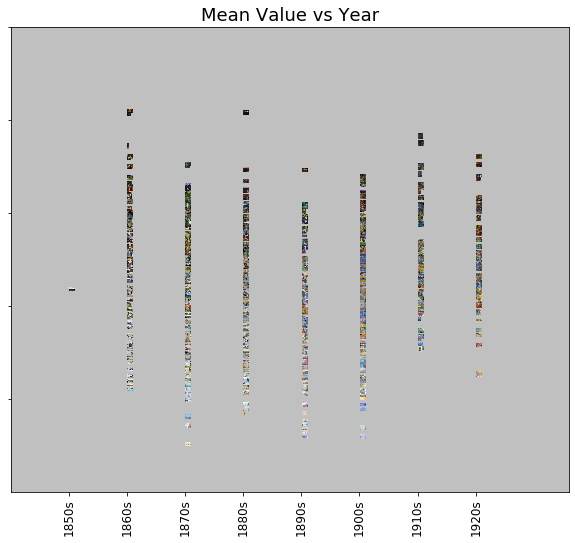

In [105]:
figure.save("meanvalue.jpg")
image = plt.imread("meanvalue.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.set_yticklabels([]) #clear y axis labels

# Set number of ticks for x-axis
ax.set_xticks([1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000])
# Set ticks labels for x-axis
ax.set_xticklabels(['1850s','1860s', '1870s', '1880s', '1890s', '1900s', '1910s', '1920s'], rotation='vertical', fontsize=12)

ax.set_title("Mean Value vs Year", fontsize = 18)

Lastly we look at the mean Saturation through the years

In [106]:
# create background image
GLOBAL_WIDTH = 10000
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (12000, GLOBAL_WIDTH), bg_color)

In [107]:
coordinates = []
thumbs = []
for i in os.listdir(r'/Users/mollyrowland/Downloads/Github/dsc160-midterm-group12/data/thumbnails/'):
    if df['name'].str.contains(str(i)).any():
        x = int(float(df.loc[df['name'] == str(i)]['axis_value'].values[0]) * GLOBAL_WIDTH)
        y = int(df.loc[df['name'] == str(i)]['mean_saturation'].values[0]*GLOBAL_WIDTH)
        co = (x, y)
        coordinates.append(co)
        thumbs.append(i)

In [109]:
# iterate over images/coords and draw to image
for i in range(len(coordinates)):
    thumb_img = Image.open(r'/Users/mollyrowland/Downloads/Github/dsc160-midterm-group12/data/thumbnails/' + str(thumbs[i]))
    figure.paste(thumb_img, coordinates[i])

[Text(0, 0, '1850s'),
 Text(0, 0, '1860s'),
 Text(0, 0, '1870s'),
 Text(0, 0, '1880s'),
 Text(0, 0, '1890s'),
 Text(0, 0, '1900s'),
 Text(0, 0, '1910s'),
 Text(0, 0, '1920s')]

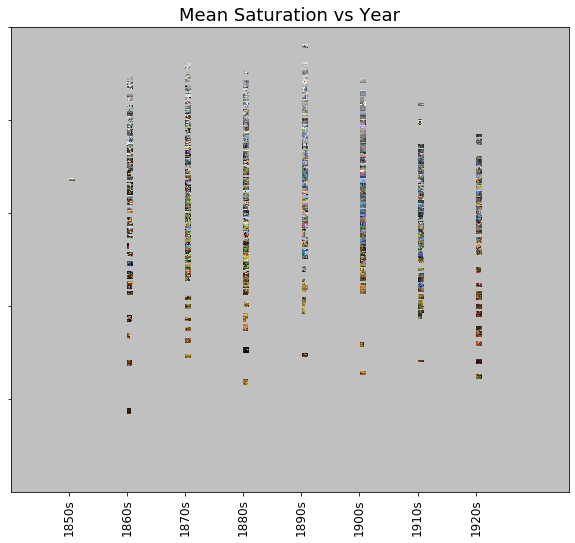

In [110]:
figure.save("meansaturation.jpg")
image = plt.imread("meansaturation.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)

ax.set_yticklabels([])
ax.set_title("Mean Saturation vs Year", fontsize = 18)
# Set number of ticks for x-axis
ax.set_xticks([1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000])
# Set ticks labels for x-axis
ax.set_xticklabels(['1850s','1860s', '1870s', '1880s', '1890s', '1900s', '1910s', '1920s'], rotation='vertical', fontsize=12)

Another interesting feature we can study are the proportion of each genre Monet painted over multiple decades. Although Monet produced works depicting a variety of subjects, he tended to focus on those found in nature. Below are the distributions of each genre from three points in Monet's career. Early on in the 1860's, we can see that he focused mainly on landscapes and cityscapes. Around the middle of his career, we see a large increase in the number of landscapes produced, the genre that mainly defined Monet's style and identity as an artist. Around the 1910's when multiple tragedies occurred in Monet's life, we notice a decline in landscapes and an increase in paintings depicting flowers. We also almost no paintings of cityscapes, possibly suggesting that Monet may have turned to more natural subjects as he coped with such tragedies. 

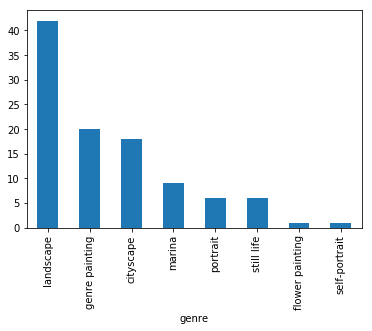

In [76]:
groups = df.groupby('date')['genre'].value_counts()
groups.loc['1860'].plot(kind='bar')

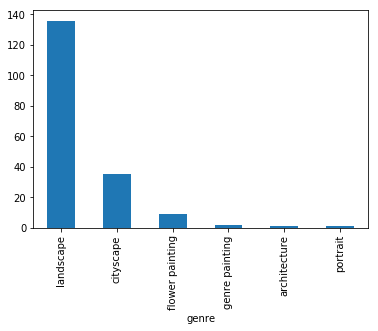

In [77]:
groups.loc['1890'].plot(kind='bar')

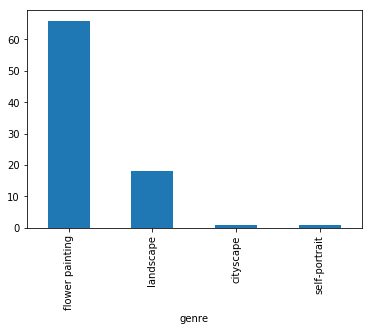

In [78]:
groups.loc['1910'].plot(kind='bar')

#### Results

After looking at the hue, brightness and saturation bitmaps, it is clear that there are no drastic changes in Monet's work after the 1910s. However, there were some slight noticable differences. After the 1910's, the mean hue of Monet's paintings were lower. When looking at the graph we can see that there were no longer any painting which had a lot of blue/pink colors but instead most of his painting were more red/green. When looking at the mean value graph, we can also see that his works were not as bright. All of his art works in the prior decades contained very bright images, but after the 1910's those disappear. Also, after the 1910's, Monet had a decrease in the number of lowly saturated paintings he created. When looking at the last graph we can see that the range of saturation for his art starts at a lower and more saturated level. This makes sense considering the brightness is also decreased. It seems like after all of his setback, Monet created paintings with a darker tone to them based on thse qualities. It seems the tragedies he faced did have a effect on the brightness and color of his paintings. We expected to see a slight change in the quality of his work after those troubling times.  